In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
data = pd.read_csv('sahtefatura.csv', sep=';')
print(data.head())
print(data.info())
print(data.describe())

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length    

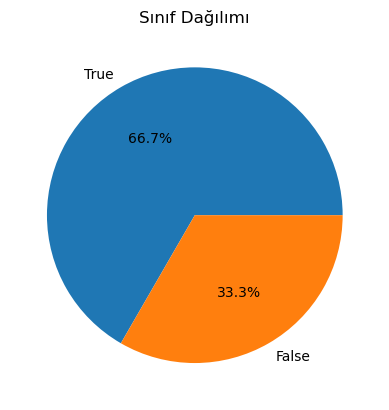

In [9]:
data['is_genuine'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sınıf Dağılımı")
plt.ylabel('')
plt.show()

In [10]:
data.fillna(data.mean(), inplace=True)

X = data.drop('is_genuine', axis=1)
y = data['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(X_test_scaled)

In [14]:
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))
print("Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))

Doğruluk Oranı: 0.9833333333333333
Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       110
        True       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Karışıklık Matrisi:
[[105   5]
 [  0 190]]
